In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from rl_equation_solver.utilities.tuner import Tuner
from rl_equation_solver.agent.a2c import Agent
from rex import init_logger

import matplotlib.pyplot as plt


In [3]:
init_logger(__name__, log_level="INFO")
init_logger("rl_equation_solver", log_level="INFO")

<Logger rl_equation_solver (INFO)>

## Run agent until solution is found a single time for sets of hyperparameters ##

In [9]:
params = {
          'gamma': [0.7, 0.8, 0.9],
          'entropy_coef': [0.2, 0.25, 0.3, 0.35],
          'critic_coef': [0.7, 0.75, 0.8, 0.85, 0.9],
          'update_freq': [10],
          'state_dim': [128],
          "learning_rate": [5e-4, 1e-4, 5e-3]
          }
run_number = 2
max_workers = 32

tuner = Tuner(params=params, run_number=run_number, max_workers=max_workers, agent=Agent)


In [11]:
tuner.run()

INFO - 2023-05-08 18:41:33,241 [algebraic.py:117] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-08 18:41:33,243 [algebraic.py:117] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-08 18:41:33,243 [algebraic.py:122] : Using reward function: diff_loss_reward.
INFO - 2023-05-08 18:41:33,244 [algebraic.py:122] : Using reward function: diff_loss_reward.
INFO - 2023-05-08 18:41:33,244 [base.py:79] : Initialized Agent with config: {'batch_size': 32, 'gamma': 0.7, 'learning_rate': 0.0005, 'hidden_size': 64, 'memory_cap': 10000, 'fill_memory_steps': 64, 'state_dim': 128, 'feature_num': 100, 'grad_clip': 10, 'device': 'cuda:0', 'entropy_coef': 0.2, 'critic_coef': 0.7}
INFO - 2023-05-08 18:41:33,244 [base.py:79] : Initialized Agent with config: {'batch_size': 32, 'gamma': 0.7, 'learning_rate': 0.0005, 'hidden_size': 64, 'memory_cap': 10000, 'fill_memory_steps': 64, 'state_dim': 128, 'feature_num': 100, 'grad_clip': 10, 'device': 'cuda:0

{'gamma': 0.7,
 'entropy_coef': 0.2,
 'critic_coef': 0.7,
 'update_freq': 10,
 'state_dim': 128,
 'learning_rate': 0.0005}

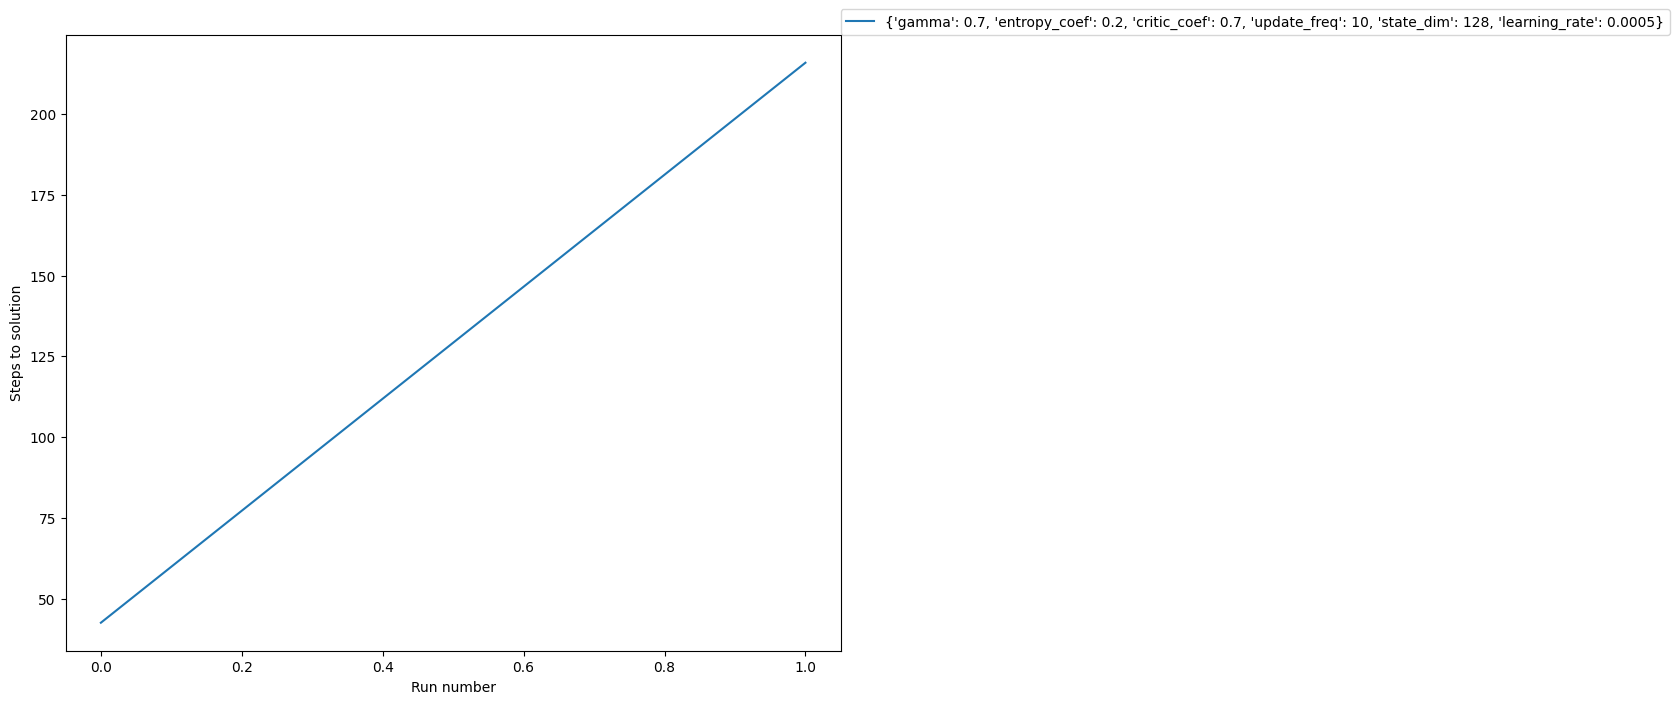

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i, config in tuner.configs.items():
    ax.plot(tuner.histories[i]['step'], label=str(config))
ax.set_ylabel("Steps to solution")
ax.set_xlabel("Run number")
plt.legend(loc=(1, 1))